In [1]:
# Declaration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ds = pd.read_csv("ds_salaries.csv")



C:\Users\abdos\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\abdos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\abdos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
ds.duplicated().sum()

0

In [4]:
ds.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Drop Unusable Data

In [5]:
ds.drop(["Unnamed: 0","salary","salary_currency"],axis=1 , inplace = True)


In [6]:
ds.nunique()


work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [7]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


## Determine Outlires and remove it 

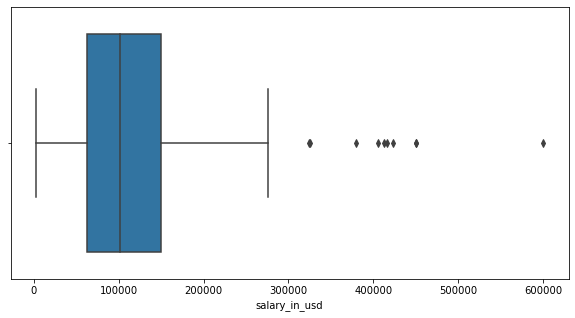

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "salary_in_usd"  ,data = ds );


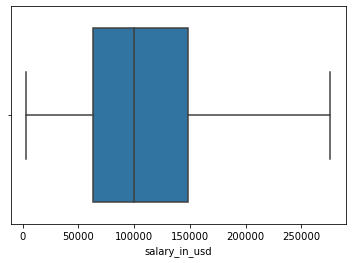

In [9]:
ds = ds [ds["salary_in_usd"] < 300000]
sns.boxplot(x = "salary_in_usd"  ,data = ds );


## Now we have clean data to work on it

## Visualization and Statistics

In [10]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [11]:
ds.describe()

,work_year,salary_in_usd,remote_ratio
count,597.000000,597.000000,597.000000
mean,2021.412060,107168.855946,70.686767
std,0.688634,58555.516292,40.797800
min,2020.000000,2859.000000,0.000000
25%,2021.000000,62649.000000,50.000000
50%,2022.000000,100000.000000,100.000000
75%,2022.000000,148261.000000,100.000000
max,2022.000000,276000.000000,100.000000


## Salary Classification 

In [12]:
ds['salary_class'] = pd.cut(x=ds['salary_in_usd'], bins=[2800,62000,140000,277000],labels=['low_region', 'mid_region', 'high_region'])
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,mid_region
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,high_region
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,mid_region
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,low_region
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,high_region


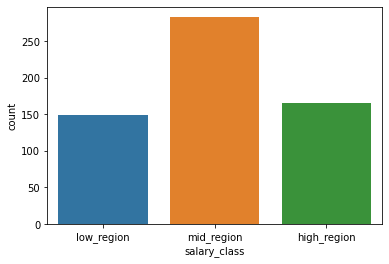

In [13]:
sns.countplot(x="salary_class" ,  data =ds );


## Salary Vs. Experience level

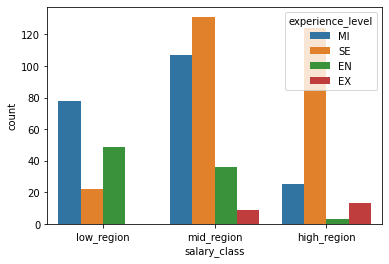

In [14]:
sns.countplot(x="salary_class" , hue="experience_level" ,  data =ds );


## Salary Vs. Employment Type


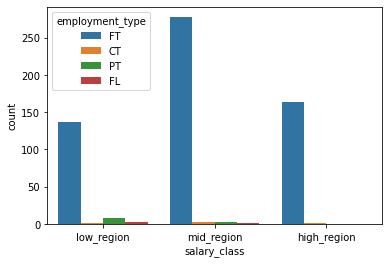

In [15]:
sns.countplot(x="salary_class" , hue="employment_type" ,  data =ds );


## Salary Vs. Company Size


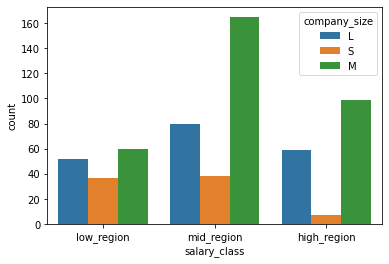

In [16]:
sns.countplot(x="salary_class" , hue="company_size" ,  data =ds );


## Salary Vs. Job Title


In [17]:
ds2=pd.DataFrame(ds.groupby("job_title")["salary_class"].max())
ds2


,salary_class
job_title,
3D Computer Vision Researcher,low_region
AI Scientist,high_region
Analytics Engineer,high_region
Applied Data Scientist,high_region
Applied Machine Learning Scientist,mid_region
BI Data Analyst,high_region
Big Data Architect,mid_region
Big Data Engineer,mid_region
Business Data Analyst,mid_region


In [18]:
ds4=pd.DataFrame(ds.groupby("job_title")["salary_class"].min())
ds4

,salary_class
job_title,
3D Computer Vision Researcher,low_region
AI Scientist,low_region
Analytics Engineer,mid_region
Applied Data Scientist,low_region
Applied Machine Learning Scientist,low_region
BI Data Analyst,low_region
Big Data Architect,mid_region
Big Data Engineer,low_region
Business Data Analyst,low_region


## company size Vs. experience level


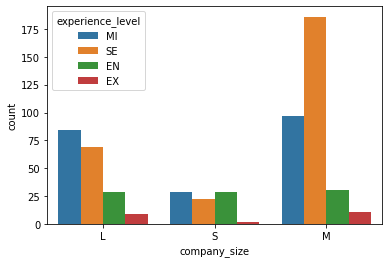

In [19]:
sns.countplot(x="company_size" , hue="experience_level" ,  data =ds );


## Correlation heatmap

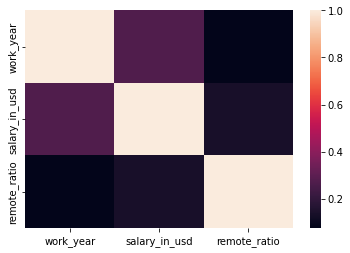

In [20]:
sns.heatmap(ds.corr());

In [21]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,mid_region
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,high_region
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,mid_region
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,low_region
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,high_region


## Some Scattring Plots 

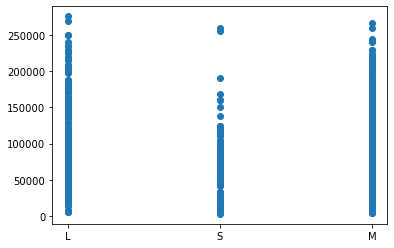

In [22]:
plt.scatter(x="company_size" , y="salary_in_usd" , data =ds);


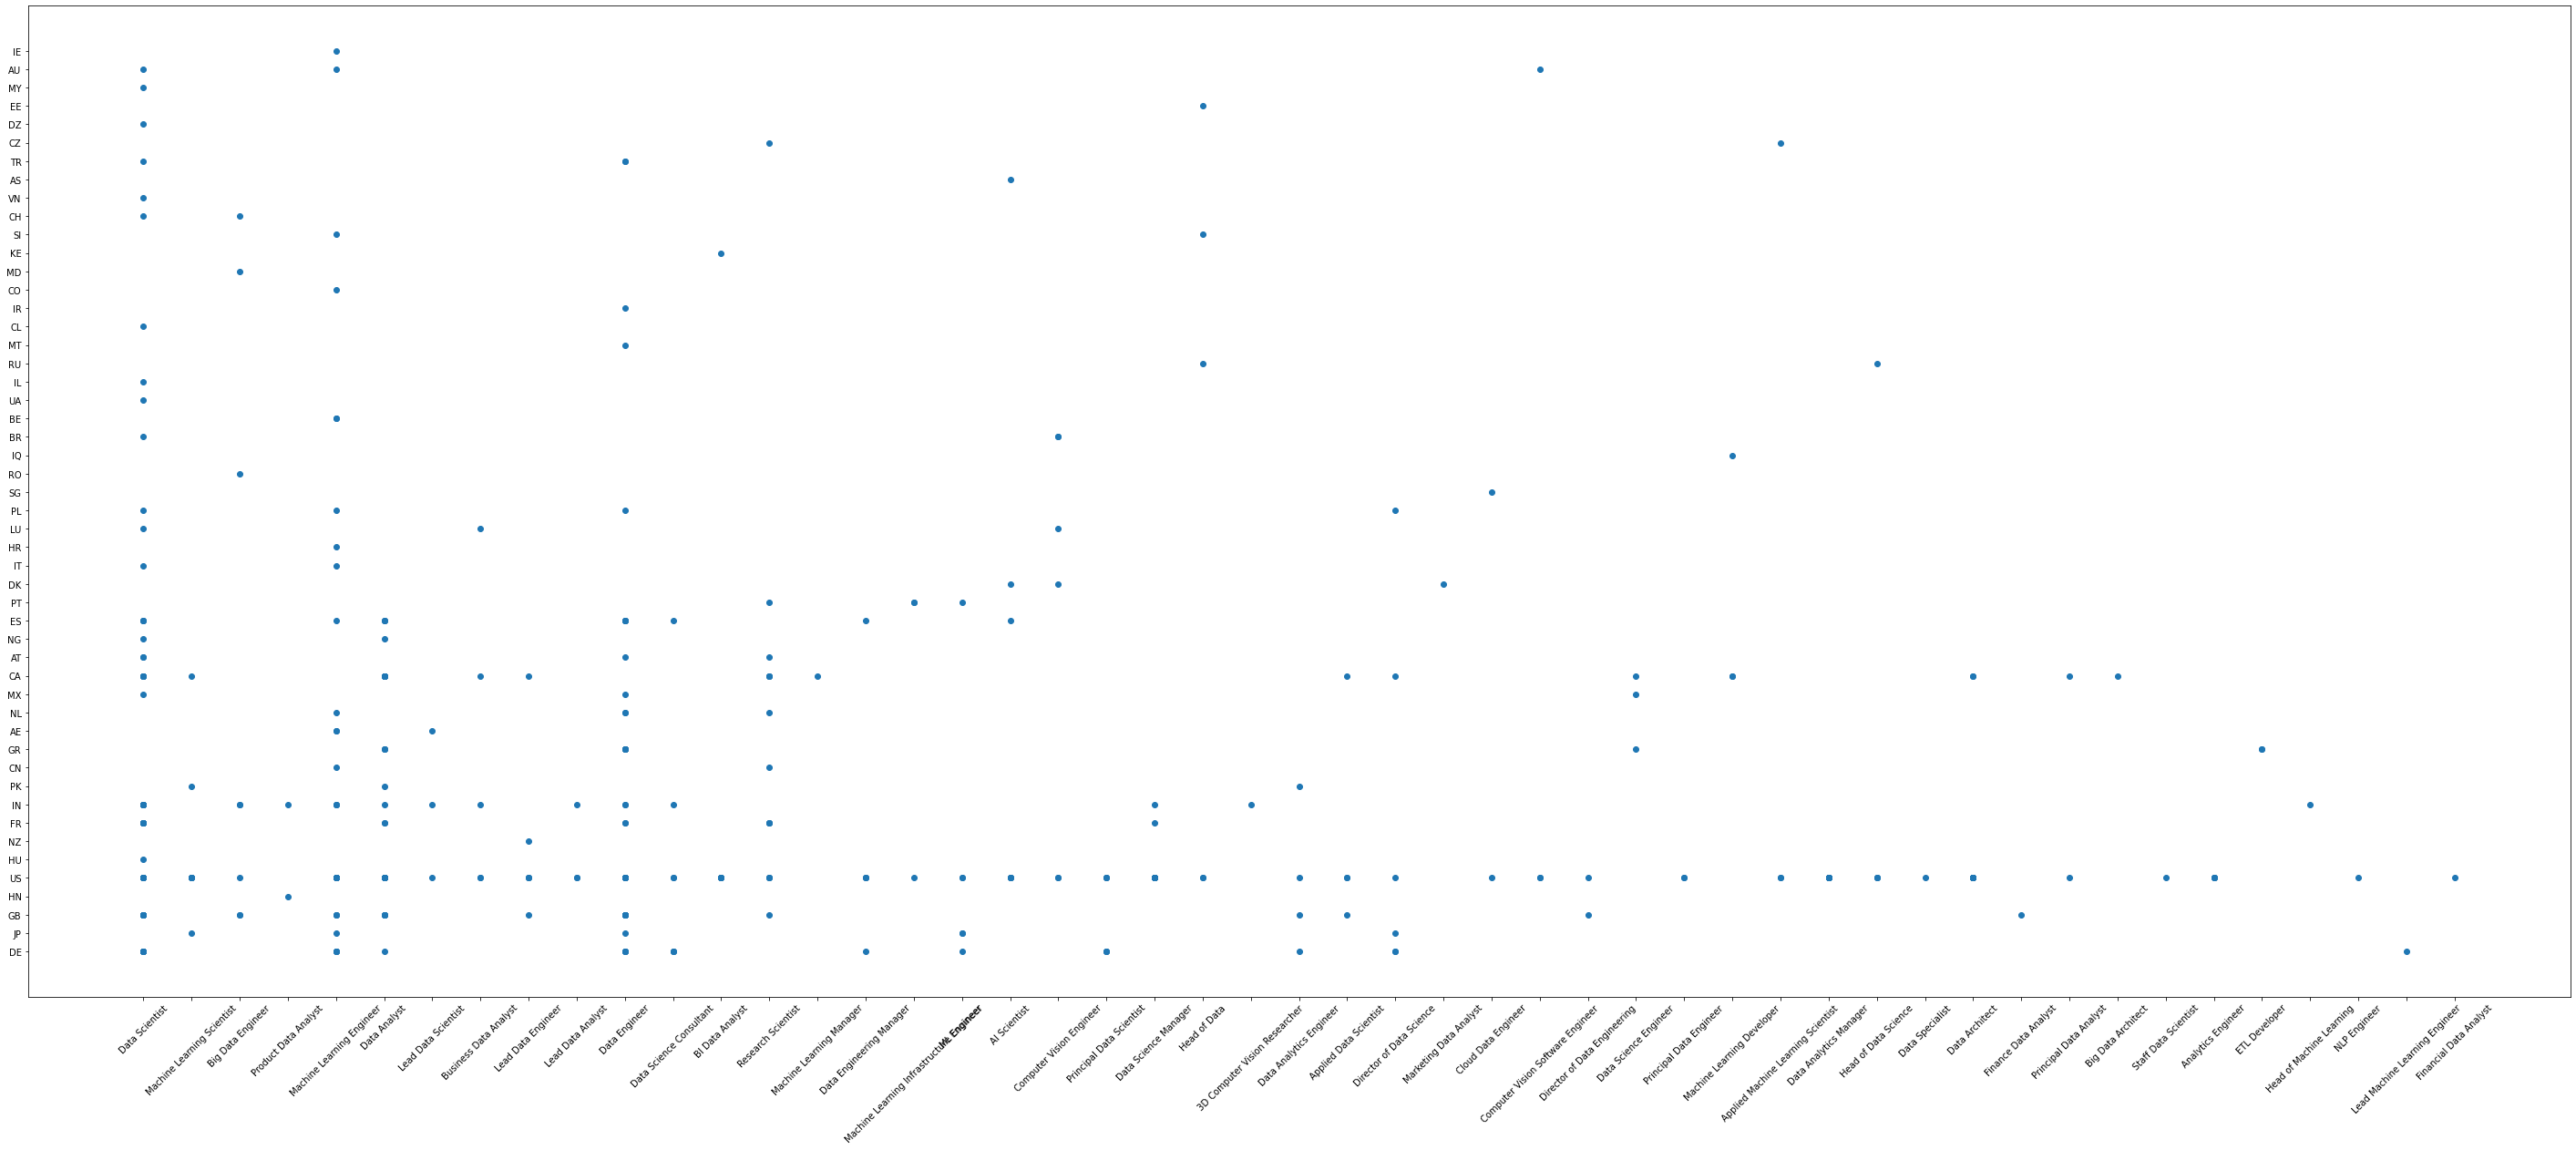

In [23]:
plt.figure(figsize=(50,20))
plt.xticks(rotation=45)
plt.scatter(x="job_title" , y="company_location" , data =ds);


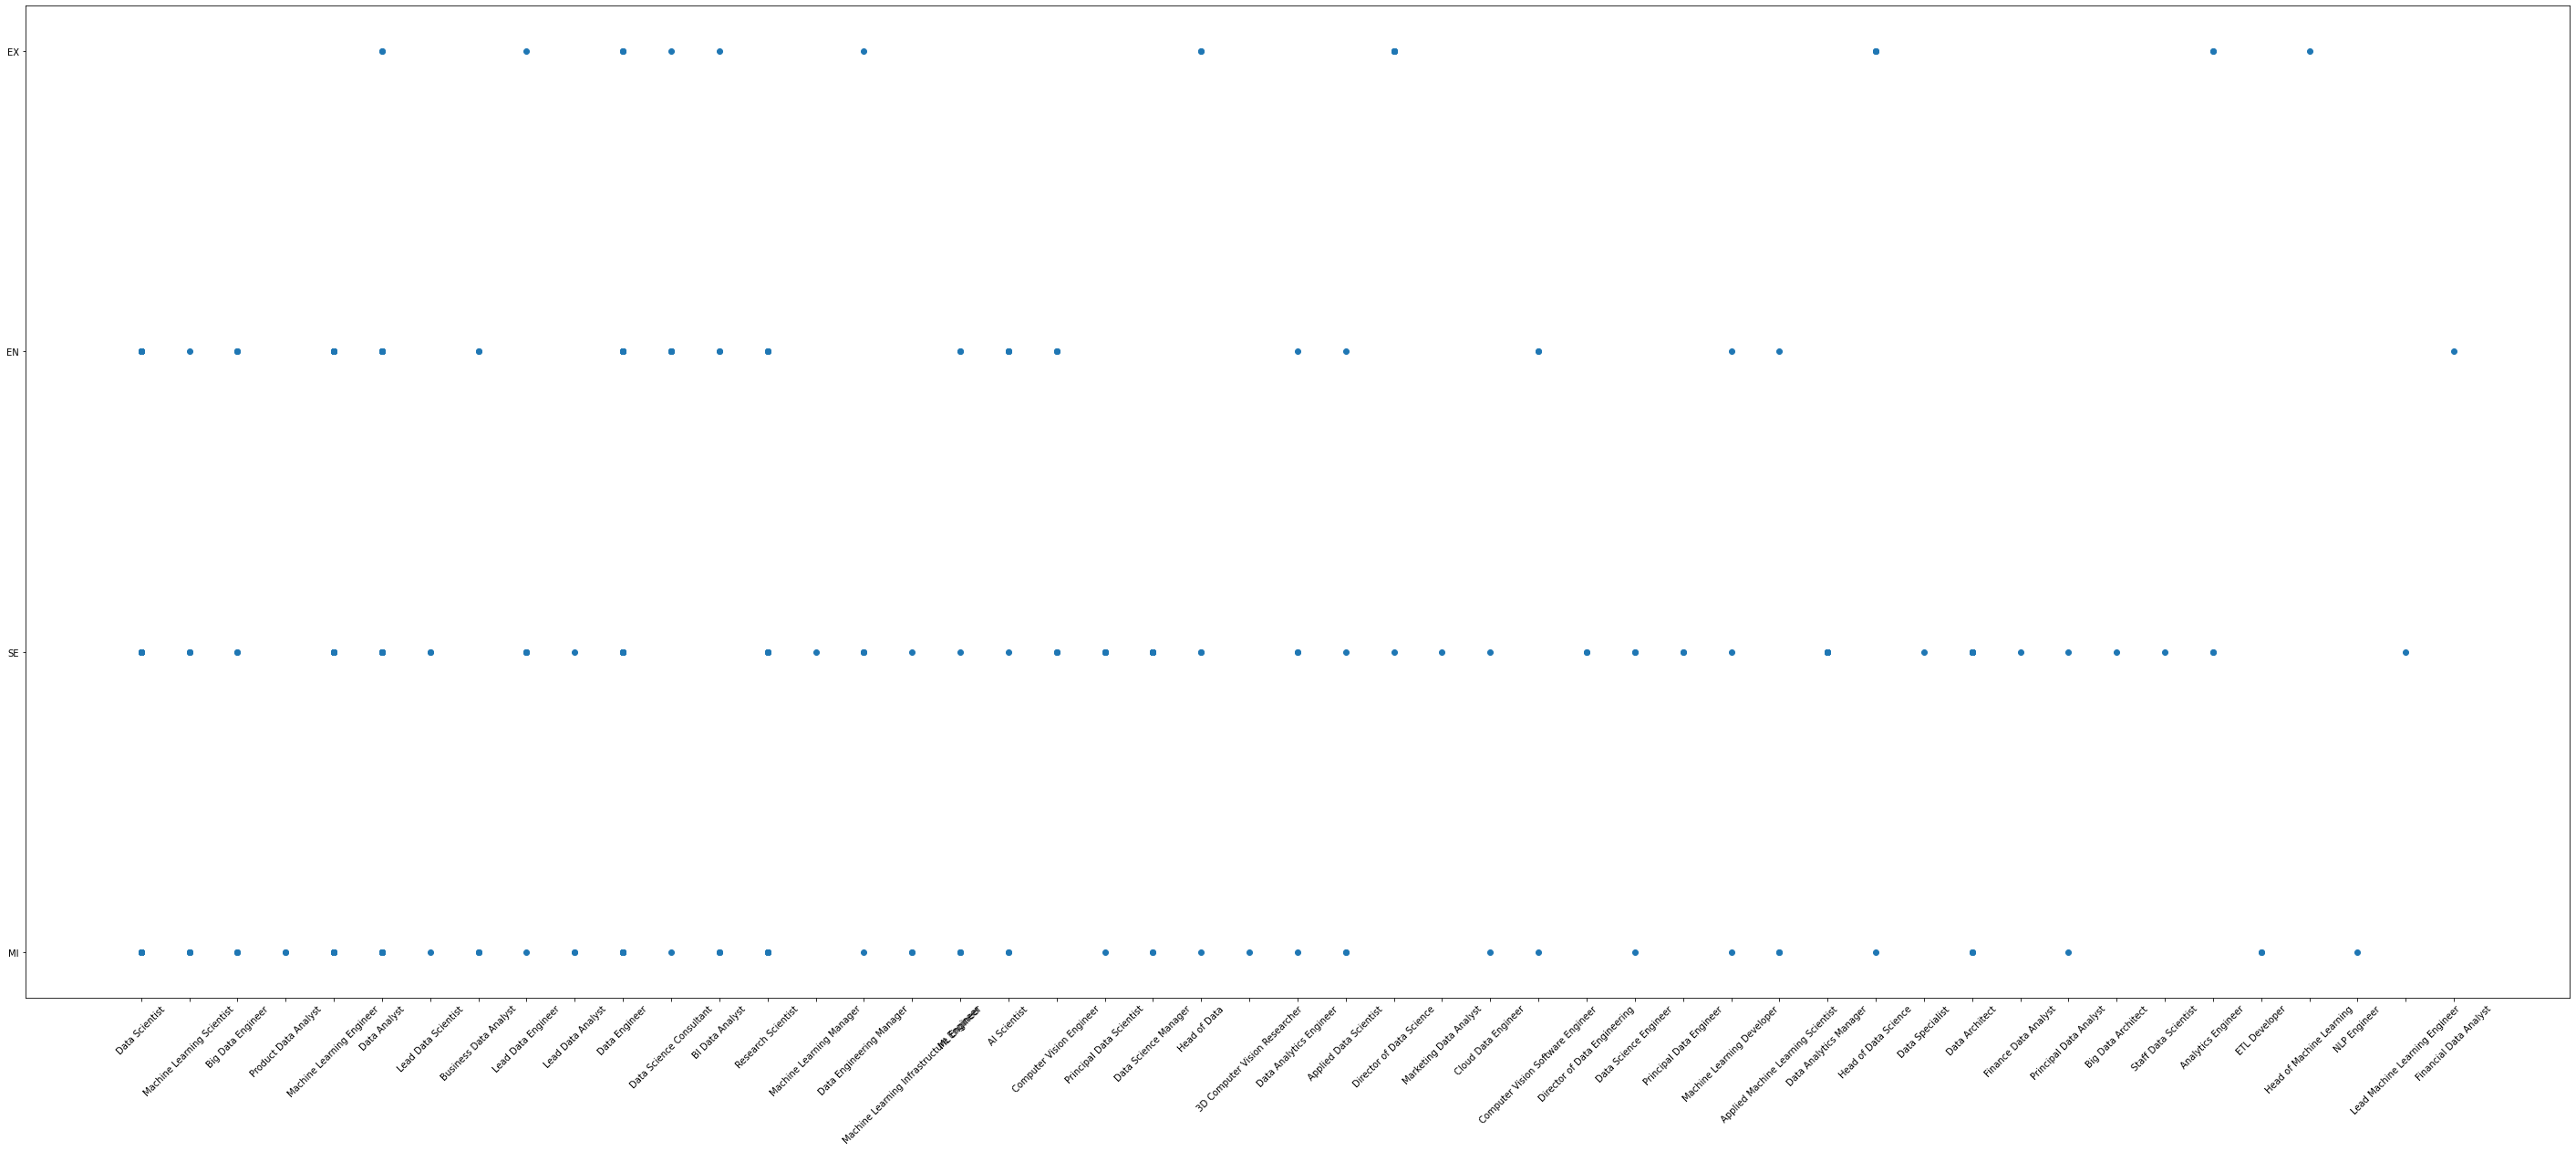

In [24]:
plt.figure(figsize=(50,20))
plt.xticks(rotation=45)
plt.scatter(x="job_title" , y="experience_level" , data =ds);


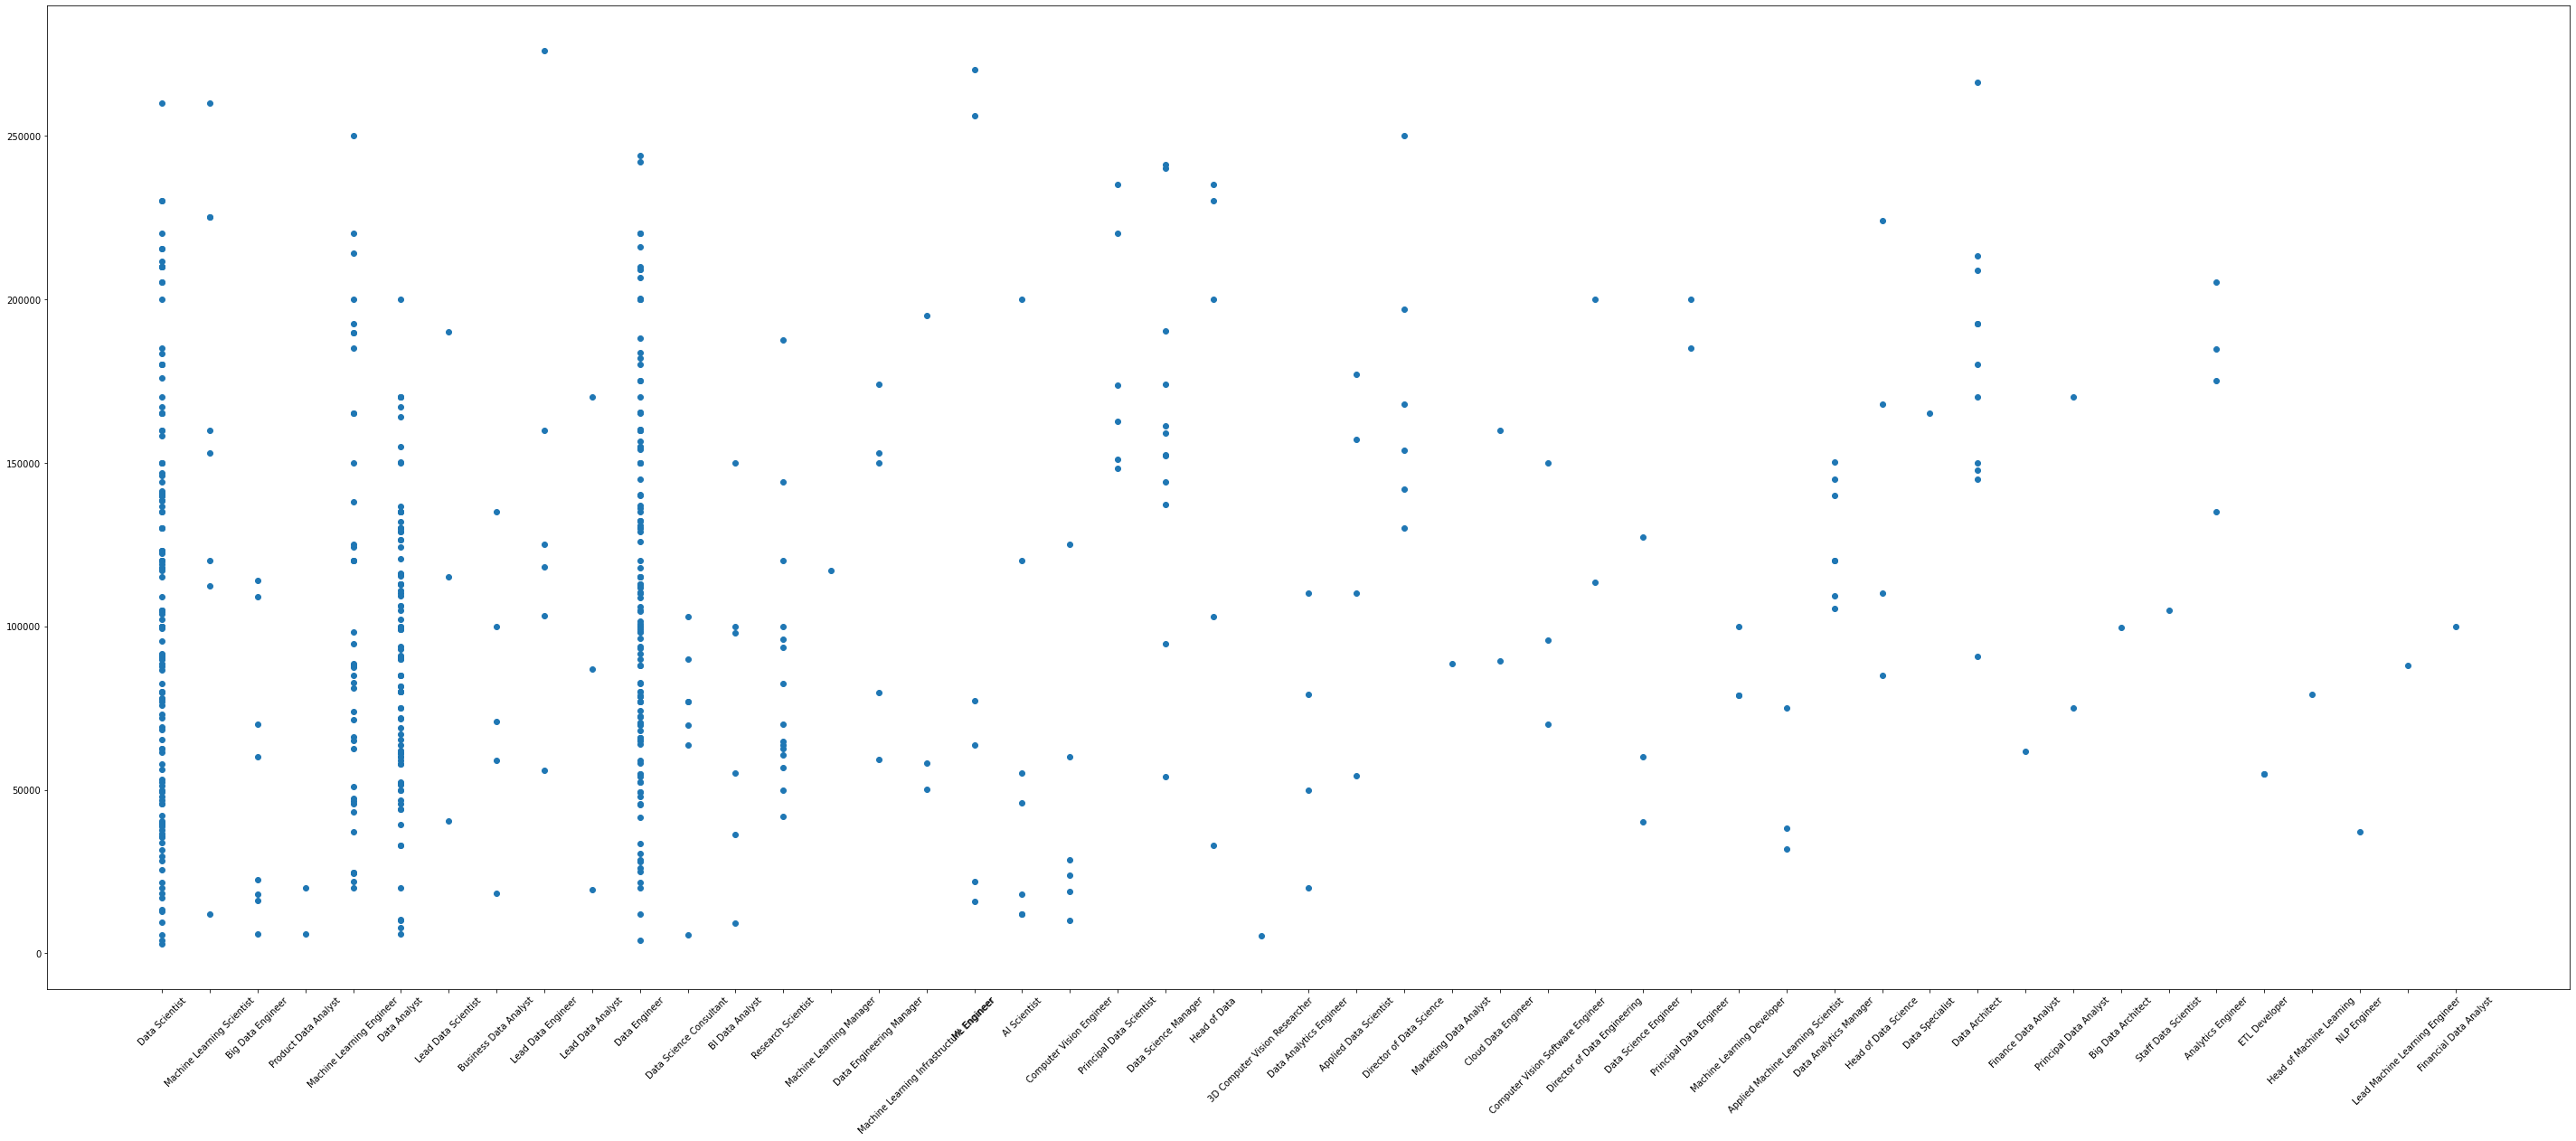

In [25]:
plt.figure(figsize=(50,20))
plt.xticks(rotation=45)
plt.scatter(x="job_title" , y="salary_in_usd" , data =ds);


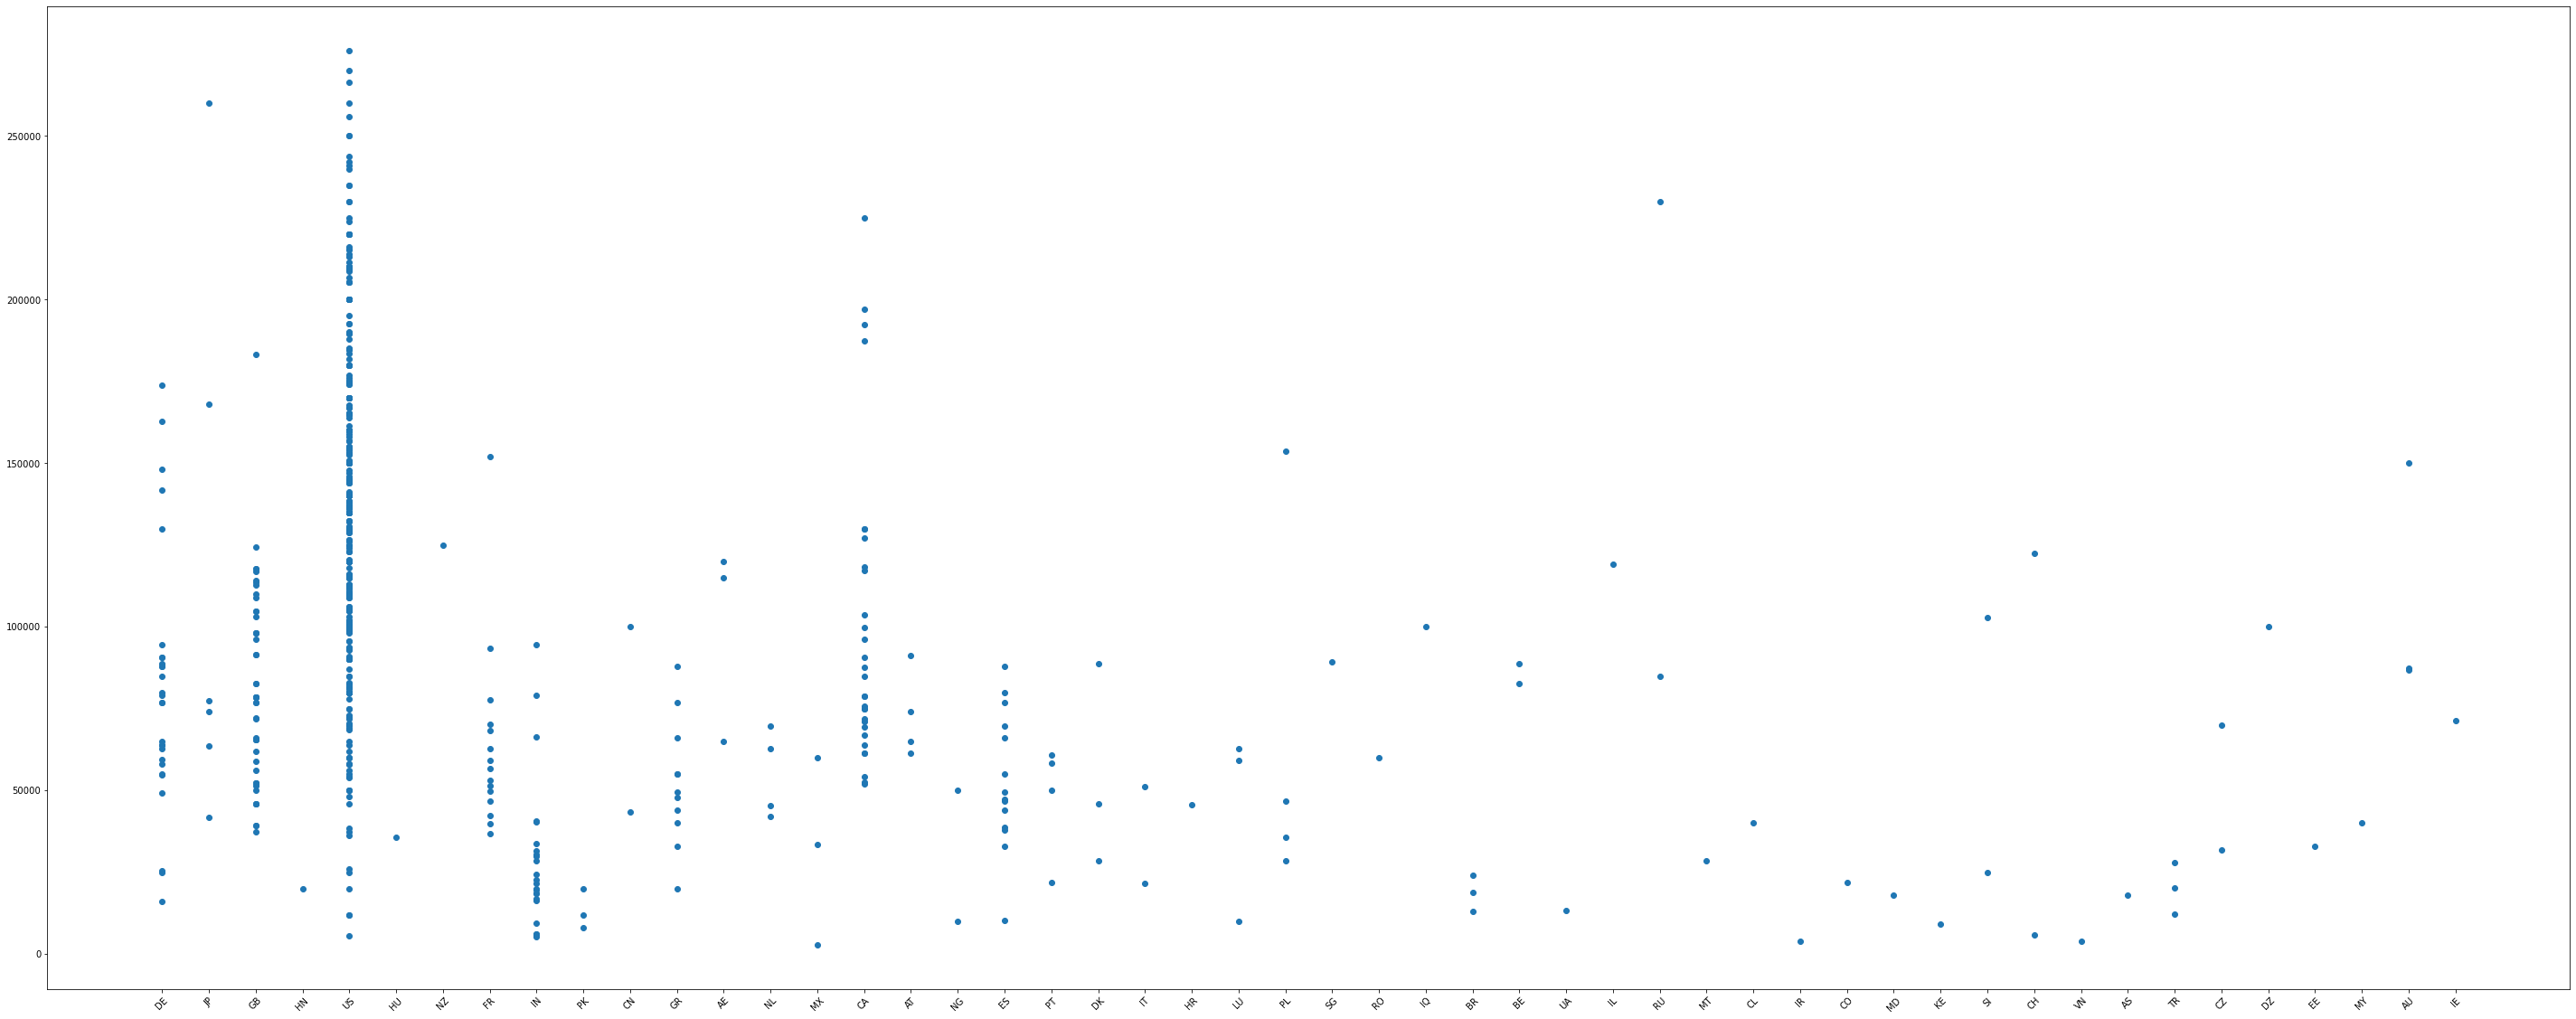

In [26]:
plt.figure(figsize=(50,20))
plt.xticks(rotation=45)
plt.scatter(x="company_location" , y="salary_in_usd" , data =ds);


## Salary Vs. work year

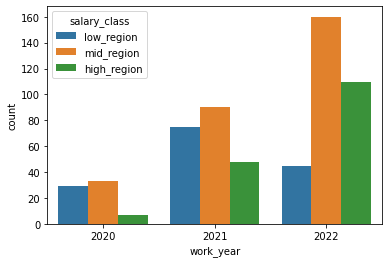

In [27]:
sns.countplot(x="work_year" , hue="salary_class" ,  data =ds );


In [28]:
ds.drop("salary_class",axis=1,inplace=True)

In [29]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [30]:
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing  

In [31]:
label_encoder = preprocessing.LabelEncoder()
ds['experience_level']= label_encoder.fit_transform(ds['experience_level'])
ds['employment_type']= label_encoder.fit_transform(ds['employment_type'])
ds['job_title']= label_encoder.fit_transform(ds['job_title'])
ds['employee_residence']= label_encoder.fit_transform(ds['employee_residence'])
ds['company_location']= label_encoder.fit_transform(ds['company_location'])
ds['company_size']= label_encoder.fit_transform(ds['company_size'])
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,21,79833,14,0,12,0
1,2020,3,2,40,260000,32,0,29,2
2,2020,3,2,7,109024,20,50,18,1
3,2020,2,2,46,20000,23,0,20,2
4,2020,3,2,37,150000,55,50,48,0


In [32]:
x=ds.drop("salary_in_usd",axis=1)
y = ds["salary_in_usd"]
model = LinearRegression().fit(x,y)

In [33]:
model.score(x,y)

0.37630160180537153

In [34]:
ds[ds["employee_residence"]==ds['company_location']]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
24,2020,2,2,33,115000,0,0,0,0
35,2020,2,2,16,74130,2,50,2,0
69,2020,3,2,21,91237,2,0,2,2
145,2021,3,2,37,82744,4,50,4,1
218,2021,2,2,37,88654,4,100,4,1
480,2022,3,2,37,120000,0,100,0,2
481,2022,3,2,37,65000,0,100,0,2
503,2022,2,2,37,87425,3,100,3,0
505,2022,0,2,21,86703,3,50,3,1
507,2022,2,2,47,64849,2,0,2,0
